# DSTL Competition (2017)

- 3 band and 16 bands
- inputs are from satellite imagery
- as alege acest set de date deoarece se aseeamana mai mult cu o situatie reala

### Well-Known Text (WKT)
Well-Known Text (WKT) is an ASCII representation of a spatial object.

WKTs are not case sensitive; Vertica recognizes any combination of lowercase and uppercase letters.

References:
https://www.vertica.com/docs/9.3.x/HTML/Content/Authoring/AnalyzingData/Geospatial/Spatial_Definitions/WellknownTextWKT.htm

# Imports

In [1]:
import pandas as pd
import tifffile as tiff
import seaborn as sns
import lib
import json
import geojson
import shapely

# Globals

In [2]:
ROOTDIR = "dstl"
TRAINWKT_FILE = "dstl/train_wkt_v4.csv"
GRIDSIZE_FILE = "dstl/grid_sizes.csv"
BANDDIR_3 = "dstl/three_band"
BANDDIR_16 = "dstl/sixteen_band"

import enum

class Vars(enum.Enum):
    mpgwkt = "MultipolygonWKT"
    classes = "ClassType"
    imageid = "ImageId"
    xmax = "Xmax"
    ymin = "Ymin"


In [3]:
Vars.mpgwkt

<Vars.mpgwkt: 'MultipolygonWKT'>

# Load datasets

In [4]:
wkt = pd.read_csv(TRAINWKT_FILE)
gs = pd.read_csv(GRIDSIZE_FILE)

In [5]:
gs.rename(columns={'Unnamed: 0': Vars.imageid.value}, inplace=True)

In [6]:
gs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ImageId  450 non-null    object 
 1   Xmax     450 non-null    float64
 2   Ymin     450 non-null    float64
dtypes: float64(2), object(1)
memory usage: 10.7+ KB


In [7]:
gs.head()

,ImageId,Xmax,Ymin
0,6120_2_4,0.009180,-0.00904
1,6120_2_3,0.009169,-0.00904
2,6120_2_2,0.009188,-0.00904
3,6120_2_1,0.009188,-0.00904
4,6120_2_0,0.009188,-0.00904


In [8]:
gs.describe().T

,count,mean,std,min,25%,50%,75%,max
Xmax,450.0,0.009153,0.000052,0.009004,0.009156,0.009169,0.009188,0.009188
Ymin,450.0,-0.009040,0.000003,-0.009045,-0.009042,-0.009040,-0.009040,-0.009031


In [9]:
wkt = pd.merge(left=wkt, right=gs, on=Vars.imageid.value)

In [10]:
wkt.head()

,ImageId,ClassType,MultipolygonWKT,Xmax,Ymin
0,6040_2_2,1,MULTIPOLYGON EMPTY,0.009158,-0.009043
1,6040_2_2,2,MULTIPOLYGON EMPTY,0.009158,-0.009043
2,6040_2_2,3,MULTIPOLYGON EMPTY,0.009158,-0.009043
3,6040_2_2,4,MULTIPOLYGON (((0.003025 -0.007879000000000001...,0.009158,-0.009043
4,6040_2_2,5,MULTIPOLYGON (((0.005311 -0.009044999999999999...,0.009158,-0.009043


In [11]:
wkt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ImageId          250 non-null    object 
 1   ClassType        250 non-null    int64  
 2   MultipolygonWKT  250 non-null    object 
 3   Xmax             250 non-null    float64
 4   Ymin             250 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 11.7+ KB


In [12]:
columns = [
    "ImageId",
    "ClassType",
]

for col in columns:
    print(wkt[col].value_counts())
    print("*" * 25)

6040_2_2    10
6160_2_1    10
6040_4_4    10
6010_1_2    10
6070_2_3    10
6060_2_3    10
6170_0_4    10
6170_4_1    10
6170_2_4    10
6010_4_4    10
6110_3_1    10
6140_1_2    10
6150_2_3    10
6120_2_2    10
6100_2_3    10
6110_1_2    10
6140_3_1    10
6110_4_0    10
6010_4_2    10
6100_1_3    10
6040_1_0    10
6040_1_3    10
6090_2_0    10
6120_2_0    10
6100_2_2    10
Name: ImageId, dtype: int64
*************************
1     25
2     25
3     25
4     25
5     25
6     25
7     25
8     25
9     25
10    25
Name: ClassType, dtype: int64
*************************


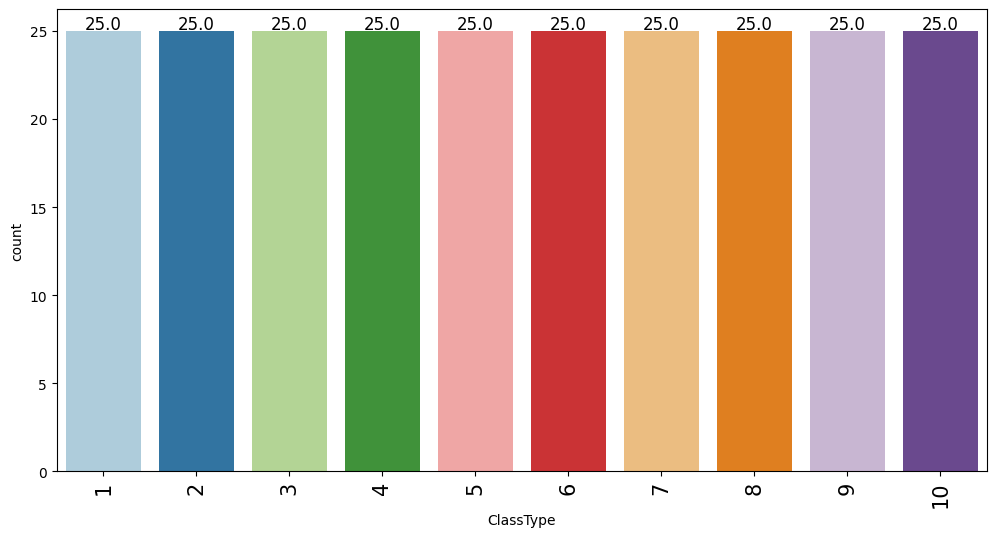

In [13]:
lib.labeled_barplot(wkt, feature='ClassType')

In [14]:
def parse_wkt(wkt_str):
    return shapely.from_wkt(wkt_str)

In [15]:
wktmp = wkt[Vars.mpgwkt.value].apply(lambda wkt: parse_wkt(wkt))

In [16]:
wkt['wkt'] = wktmp

In [18]:
wkt

,ImageId,ClassType,MultipolygonWKT,Xmax,Ymin,wkt
0,6040_2_2,1,MULTIPOLYGON EMPTY,0.009158,-0.009043,MULTIPOLYGON EMPTY
1,6040_2_2,2,MULTIPOLYGON EMPTY,0.009158,-0.009043,MULTIPOLYGON EMPTY
2,6040_2_2,3,MULTIPOLYGON EMPTY,0.009158,-0.009043,MULTIPOLYGON EMPTY
3,6040_2_2,4,MULTIPOLYGON (((0.003025 -0.007879000000000001...,0.009158,-0.009043,"MULTIPOLYGON (((0.003025 -0.007879, 0.003074 -..."
4,6040_2_2,5,MULTIPOLYGON (((0.005311 -0.009044999999999999...,0.009158,-0.009043,"MULTIPOLYGON (((0.005311 -0.009045, 0.00531 -0..."
...,...,...,...,...,...,...
245,6100_2_2,6,"MULTIPOLYGON (((0.006102 -0.009042, 0.00642 -0...",0.009156,-0.009042,"MULTIPOLYGON (((0.006102 -0.009042, 0.00642 -0..."
246,6100_2_2,7,MULTIPOLYGON (((0.007887999999999999 -0.009042...,0.009156,-0.009042,"MULTIPOLYGON (((0.007888 -0.009042, 0.007856 -..."
247,6100_2_2,8,"MULTIPOLYGON (((0.002119 -0.001417, 0.002132 -...",0.009156,-0.009042,"MULTIPOLYGON (((0.002119 -0.001417, 0.002132 -..."
248,6100_2_2,9,"MULTIPOLYGON (((0.008021 -0.003252, 0.00803399...",0.009156,-0.009042,"MULTIPOLYGON (((0.008021 -0.003252, 0.008034 -..."
